In [1]:
import os
import pandas as pd

#set paths and files as variables
root_path = "/Users/Jackie/Desktop/NCI_screen/nci_screen_csv"
filenames = ["collaborations_pharma_conc_resp_data.csv", "collaborations_pharma_endpoint_data.csv"]

In [2]:
stat_resp_dfs: list[pd.DataFrame]  = []

for filename in filenames:
    file_path = os.path.join(root_path, filename)
    df = pd.read_csv(file_path, header=0)
    stat_resp_dfs.append(df)                                        

In [14]:
stat_resp_dfs[1].head()
stat = stat_resp_dfs[1]

#define cols to merge on
merge_cols = ["nsc", "line_name", "exp_id"] 

#pivot stats so that they match viability result row in df[0]. aka every row is a compound-cell line-endpoint activity match 
piv_stat = stat.pivot(index = ["nsc", "line_name", "exp_id", "smiles"], columns="endpoint", values=["mean", "std_dev"]).reset_index()
piv_stat.columns = piv_stat.columns.map("_".join).str.rstrip("_")
piv_stat.head()

# Merge the dataframes using an outer join
merged_stat_resp = stat_resp_dfs[0].merge(piv_stat, how="outer", on=merge_cols)

# Display the merged dataframe
merged_stat_resp.head()

merged_stat_resp.to_csv('20240729merged_stat_resp.csv', index=False)

: 

In [7]:
# this is for converting the dataframe that i need for modeling into a csv file that renuka can peruse on excel. I will never use this variable/df again.

# Save the DataFrame to a CSV file
merged_stat_resp.to_csv('merged_stat_resp.csv', index=False)

columns_list = merged_stat_resp.columns.tolist()
print(columns_list)

# Columns to be removed so that Renuka/others can view relvant bio info in excel and keep data for modeling untouched
columns_to_remove = ["discreet", "cas_number", "cas_string", "nsc_compound_namecode", "drug_name"]
# Drop the specified columns from the DataFrame
merged_stat_resp_drop = merged_stat_resp.drop(columns=columns_to_remove)

# Display the DataFrame after removing the columns
print(merged_stat_resp_drop.head())

# Save the DataFrame to a CSV file
merged_stat_resp_drop.to_csv('merged_stat_resp_viewable.csv', index=False)

['conc_resp_assay_id', 'conc_resp_element_id', 'exp_id', 'nsc', 'log_hi_conc', 'conc_unit', 'assay_time', 'cas_number', 'cas_string', 'discreet', 'drug_name', 'nsc_compound_namecode', 'target', 'line_name', 'concentration', 'mean_pct_ctrl', 'stddev_pct_ctrl', 'count_pct_ctrl', 'mean_giprcnt', 'stddev_giprcnt', 'count_giprcnt', 'mean_GI50', 'mean_IC50', 'mean_LC50', 'mean_TGI', 'std_dev_GI50', 'std_dev_IC50', 'std_dev_LC50', 'std_dev_TGI']


In [32]:
stat_resp_dfs[1].head()

smlr = stat_resp_dfs[1].loc[0:1000, ["nsc", "line_name", "exp_id", "endpoint", "mean", "std_dev"]]

#piv_smlr = smlr.pivot(columns = 'endpoint', values= ['std_dev')
# pivot on enpoint and make new columns from multiindex
piv_smlr = smlr.pivot(index = ["nsc", "line_name", "exp_id"], columns="endpoint", values=["mean", "std_dev"]).reset_index()
# join multiindex columns on 
piv_smlr.columns = piv_smlr.columns.map("_".join).str.rstrip("_")
piv_smlr.head()

,nsc,line_name,exp_id,mean_GI50,mean_IC50,mean_LC50,mean_TGI,std_dev_GI50,std_dev_IC50,std_dev_LC50,std_dev_TGI
0,824093,SR,2009NS46,-5.9960,NaN,NaN,NaN,0.0,NaN,NaN,NaN
1,828656,786-0,2105NS27,-6.3658,-6.1831,-4.0000,NaN,0.0,0.0,0.0,NaN
2,828656,786-0,2106RS46,-6.4086,-6.1540,NaN,NaN,0.0,0.0,NaN,NaN
3,828656,A498,2105NS27,NaN,-4.0000,-4.0000,NaN,NaN,0.0,0.0,NaN
4,828656,A498,2106RS46,NaN,-4.0000,-4.0000,NaN,NaN,0.0,0.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...
324,838466,UACC-257,2307RS40,-5.7681,-5.4497,-5.0520,-5.4100,0.0,0.0,0.0,0.0
325,838466,UACC-62,2210NS59,-6.3776,-5.9050,-5.3736,-5.7805,0.0,0.0,0.0,0.0
326,838466,UACC-62,2307RS40,-6.4613,-6.0673,-5.3502,-5.8175,0.0,0.0,0.0,0.0
327,838466,UO-31,2210NS59,-6.5243,-6.1836,-5.4421,-5.8843,0.0,0.0,0.0,0.0


In [4]:
merged_stat_resp.head()

,conc_resp_assay_id,conc_resp_element_id,exp_id,nsc,log_hi_conc,conc_unit,assay_time,cas_number,cas_string,discreet,...,count_giprcnt,smiles,mean_GI50,mean_IC50,mean_LC50,mean_TGI,std_dev_GI50,std_dev_IC50,std_dev_LC50,std_dev_TGI
0,13342897,66609633,1702NS56,795222,-4,M,2,NaN,NaN,N,...,1,Cc1ccn2c3C(=O)c4ccccc4C(=O)c3c(C(=O)O)c2c1,-4.1173,-4.0,-4.0,-4.0,0.0,0.0,0.0,0.0
1,13342897,66609634,1702NS56,795222,-4,M,2,NaN,NaN,N,...,1,Cc1ccn2c3C(=O)c4ccccc4C(=O)c3c(C(=O)O)c2c1,-4.1173,-4.0,-4.0,-4.0,0.0,0.0,0.0,0.0
2,13342897,66609635,1702NS56,795222,-4,M,2,NaN,NaN,N,...,1,Cc1ccn2c3C(=O)c4ccccc4C(=O)c3c(C(=O)O)c2c1,-4.1173,-4.0,-4.0,-4.0,0.0,0.0,0.0,0.0
3,13342897,66609636,1702NS56,795222,-4,M,2,NaN,NaN,N,...,1,Cc1ccn2c3C(=O)c4ccccc4C(=O)c3c(C(=O)O)c2c1,-4.1173,-4.0,-4.0,-4.0,0.0,0.0,0.0,0.0
4,13342897,66609637,1702NS56,795222,-4,M,2,NaN,NaN,N,...,1,Cc1ccn2c3C(=O)c4ccccc4C(=O)c3c(C(=O)O)c2c1,-4.1173,-4.0,-4.0,-4.0,0.0,0.0,0.0,0.0


Ok now that I have a df with all of the relevant compound-cell line-activity data and metadata, i want to get a sense of the structure of the data by looking at a histogram of numerical attributes and also briefly see how many null values i have in the ic50 data since i will be using that feature for my models to start.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44109 entries, 0 to 44108
Data columns (total 30 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   conc_resp_assay_id     44109 non-null  int64  
 1   conc_resp_element_id   44109 non-null  int64  
 2   exp_id                 44109 non-null  object 
 3   nsc                    44109 non-null  int64  
 4   log_hi_conc            44109 non-null  int64  
 5   conc_unit              44109 non-null  object 
 6   assay_time             44109 non-null  int64  
 7   cas_number             0 non-null      float64
 8   cas_string             0 non-null      float64
 9   discreet               44109 non-null  object 
 10  drug_name              0 non-null      float64
 11  nsc_compound_namecode  44109 non-null  object 
 12  target                 44109 non-null  object 
 13  line_name              44109 non-null  object 
 14  concentration          44109 non-null  int64  
 15  me

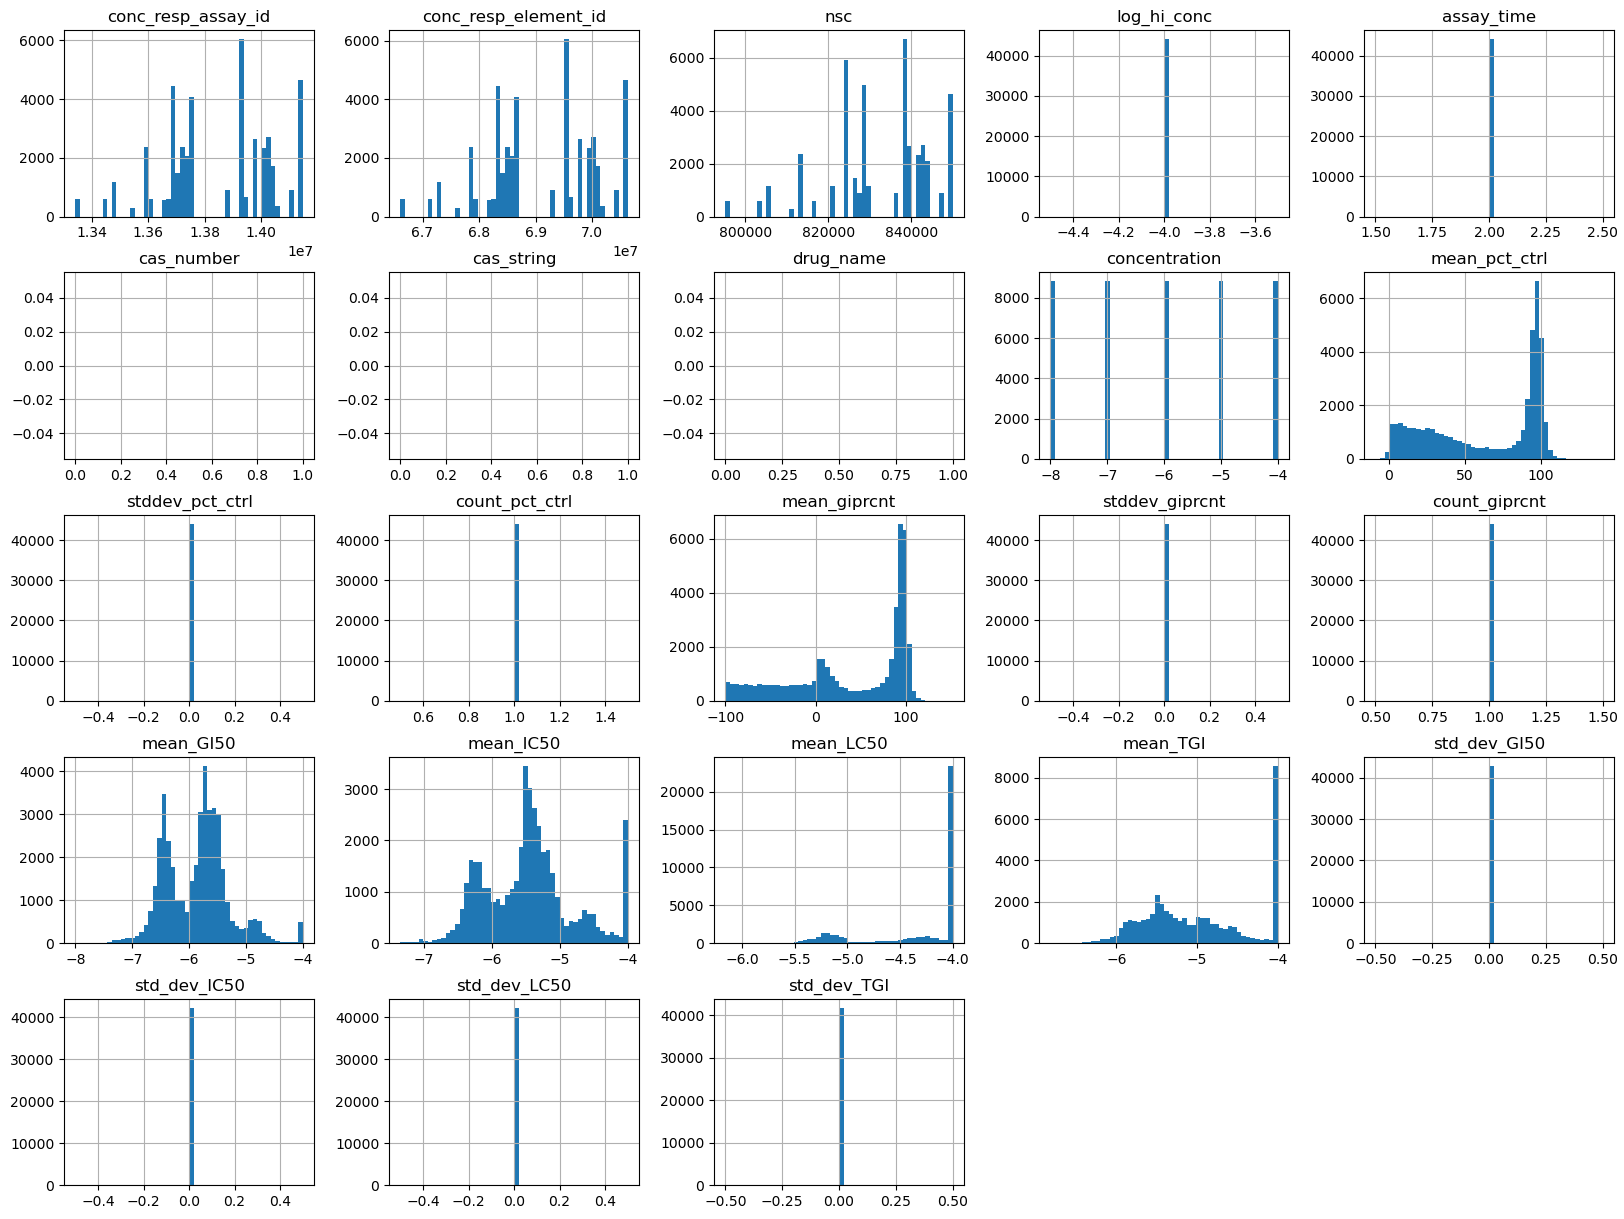

In [19]:
merged_stat_resp.info()

%matplotlib inline
import matplotlib.pyplot as plt

merged_stat_resp.hist(bins=50, figsize=(20,15))
plt.show()

histogram data shows that ther are 2 groups of 'hi' and 'low' responding groups in mean_ic50. Also some of these attributes are not going to be useful because they are mostly empty (cas_number, cas_string, drug_name), are all value = 0 (std_devs, count_), or they are all the same value like log_hi which i think means the max log10 dose value for ic50? i need to double-check the header explainer from NCI again. Also, mean_pct distrobution a tail which could be a problem for ML models so I will need to log transform them. 
    Next, I will set aside 20% of my instances to create a test set of my data. this will prevent a bias for selecting a model during the data exploration step. 

In [5]:
import numpy as np


In [6]:
from sklearn.model_selection import train_test_split

stat_resp_train_set, stat_resp_test_set = train_test_split(merged_stat_resp, test_size=0.2)

expl_stat_resp = stat_resp_train_set.copy()
expl_stat_resp.head()

,conc_resp_assay_id,conc_resp_element_id,exp_id,nsc,log_hi_conc,conc_unit,assay_time,cas_number,cas_string,discreet,...,count_giprcnt,smiles,mean_GI50,mean_IC50,mean_LC50,mean_TGI,std_dev_GI50,std_dev_IC50,std_dev_LC50,std_dev_TGI
32063,14014776,69969019,2307NS43,841990,-4,M,2,NaN,NaN,Y,...,1,Oc1ccc2c(C#N)c(NC(=O)c3cccc(c3)C(F)(F)F)sc2c1N...,-5.5753,-5.3806,-4.0000,-4.0000,0.0,0.0,0.0,0.0
16340,13737889,68584585,2103NS98,828169,-4,M,2,NaN,NaN,N,...,1,CCOC(=O)c1c(NC(=O)c2cccc(c2)C(F)(F)F)sc3c4CN(C...,-5.7758,-5.5326,-5.2166,-5.4962,0.0,0.0,0.0,0.0
24745,13923815,69514211,2212RS80,837900,-4,M,2,NaN,NaN,Y,...,1,FC(F)(F)c1ccc(cc1Cl)C(=O)Nc2sc3CC(=O)CCc3c2C#N,-5.4430,-4.9962,-4.0523,-4.7403,0.0,0.0,0.0,0.0
36891,14049930,70144787,2309NS73,844082,-4,M,2,NaN,NaN,Y,...,1,Fc1ccc(C(=O)Nc2sc3CC(=O)CCc3c2C#N)c(Cl)c1,-5.6609,-5.2750,-4.0000,-4.8754,0.0,0.0,0.0,0.0
24631,13923780,69514037,2212RS80,837900,-4,M,2,NaN,NaN,Y,...,1,FC(F)(F)c1ccc(cc1Cl)C(=O)Nc2sc3CC(=O)CCc3c2C#N,-6.3552,-6.2682,-4.0000,-4.7929,0.0,0.0,0.0,0.0


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


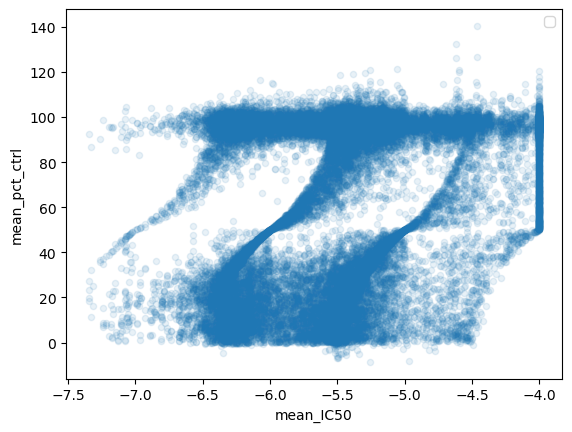

In [104]:
expl_stat_resp.plot(kind="scatter", x="mean_IC50", y="mean_pct_ctrl" , alpha=0.1
                    #c="mean_pct_ctrl", cmap=plt.get_cmap("jet"), colorbar=True
)
plt.legend()

<Axes: >

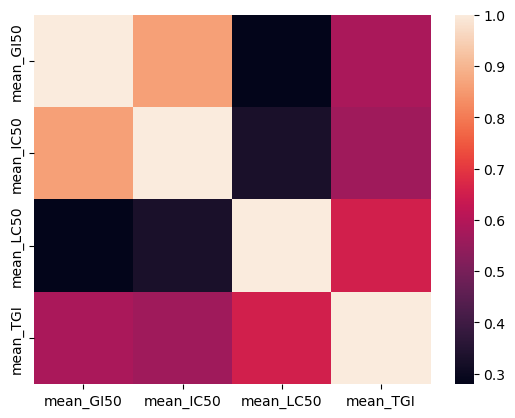

In [96]:
import seaborn as sns
drop_cols = ["conc_resp_assay_id", "conc_resp_element_id", "exp_id", "nsc", "log_hi_conc",
             "conc_unit", "assay_time", "cas_number", "cas_string", "discreet", "count_giprcnt",
               "smiles", "std_dev_GI50", "std_dev_IC50", "std_dev_LC50", "std_dev_TGI",
               "drug_name", "nsc_compound_namecode", "target", "line_name", "concentration", 
                "stddev_giprcnt", "stddev_pct_ctrl", "count_pct_ctrl", "mean_pct_ctrl", "mean_giprcnt" ]

corr_df = expl_stat_resp.drop(columns=drop_cols)

corr = corr_df.corr()
sns.heatmap(corr)

Pearson correlation plot shows poor correlatiopn between LC50 and GI50 and IC50. Also, TGI (total growth inhibition which measures cytostatic effect) is well-correlated with all endpoint data, especially LC50 which measures 50% lethality. Additionally, IC50 and GI50 are well correlated. 

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


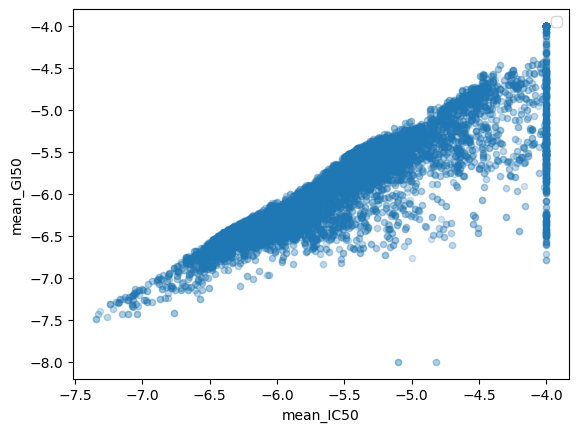

In [109]:
expl_stat_resp.plot(kind="scatter", x="mean_IC50", y="mean_GI50" , alpha=0.1               
)
plt.legend()

So this scatter plot of mean_GI50 vs mean_IC50 shows a direct correlation/linear relationship b/w IC50 and GI50. That means that these attributes depend on one another/share information. 

I have tails in my IC50 data so I need to log transform. I also need to wrap-up pre-processing and clean up my SMILES list + encode cell line information for proof of principle work on predicting viability.
    First, I want to do one more thing and look at NAs

In [7]:
# new dataframe with numeric values
drop_cols2 = ["conc_resp_assay_id", "conc_resp_element_id", "exp_id", "nsc", "log_hi_conc",
             "conc_unit", "assay_time", "cas_number", "cas_string", "discreet", "count_giprcnt",
               "smiles", "std_dev_GI50", "std_dev_IC50", "std_dev_LC50", "std_dev_TGI",
               "drug_name", "nsc_compound_namecode", "target", "line_name", "concentration", 
                "stddev_giprcnt", "stddev_pct_ctrl", "count_pct_ctrl"]

na_df = expl_stat_resp.drop(columns=drop_cols2)

# Check for missing values in numeric coldata
missing_values = na_df.isnull().sum()
print(missing_values)

mean_pct_ctrl       0
mean_giprcnt        0
mean_GI50         957
mean_IC50        1471
mean_LC50        1492
mean_TGI         1880
dtype: int64


There are a lot in eacn mean_endpoint rowdata 

In [8]:
missing_percentage = na_df.isnull().mean() * 100
print(missing_percentage)

mean_pct_ctrl    0.000000
mean_giprcnt     0.000000
mean_GI50        2.712047
mean_IC50        4.168674
mean_LC50        4.228186
mean_TGI         5.327741
dtype: float64


between 2-5% of data contains NaNs all in the endpoint data values. Now I want viz this real quick

In [9]:

# Plot a heatmap to visualize missing values
plt.figure(figsize=(12, 6))
sns.heatmap(na_df.isnull(), cbar=False, cmap='viridis')
plt.title('Heatmap of Missing Values')
plt.show()

NameError: name 'plt' is not defined

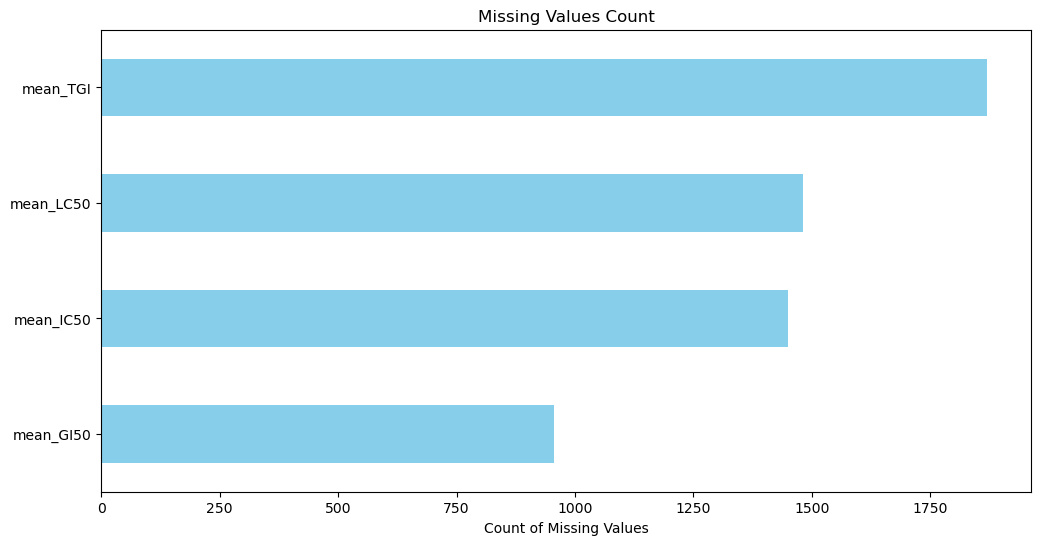

In [123]:
# Bar plot of missing values
missing_count = na_df.isnull().sum()
missing_count = missing_count[missing_count > 0]  # Only show columns with missing values
missing_count.sort_values(inplace=True)

plt.figure(figsize=(12, 6))
missing_count.plot(kind='barh', color='skyblue')
plt.xlabel('Count of Missing Values')
plt.title('Missing Values Count')
plt.show()

C:\Users\Jackie\AppData\Local\Temp\ipykernel_39348\1707465677.py:17: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  missing_by_category = na_cat_df.groupby(category_columns).apply(lambda x: x.isnull().sum())


NameError: name 'plt' is not defined

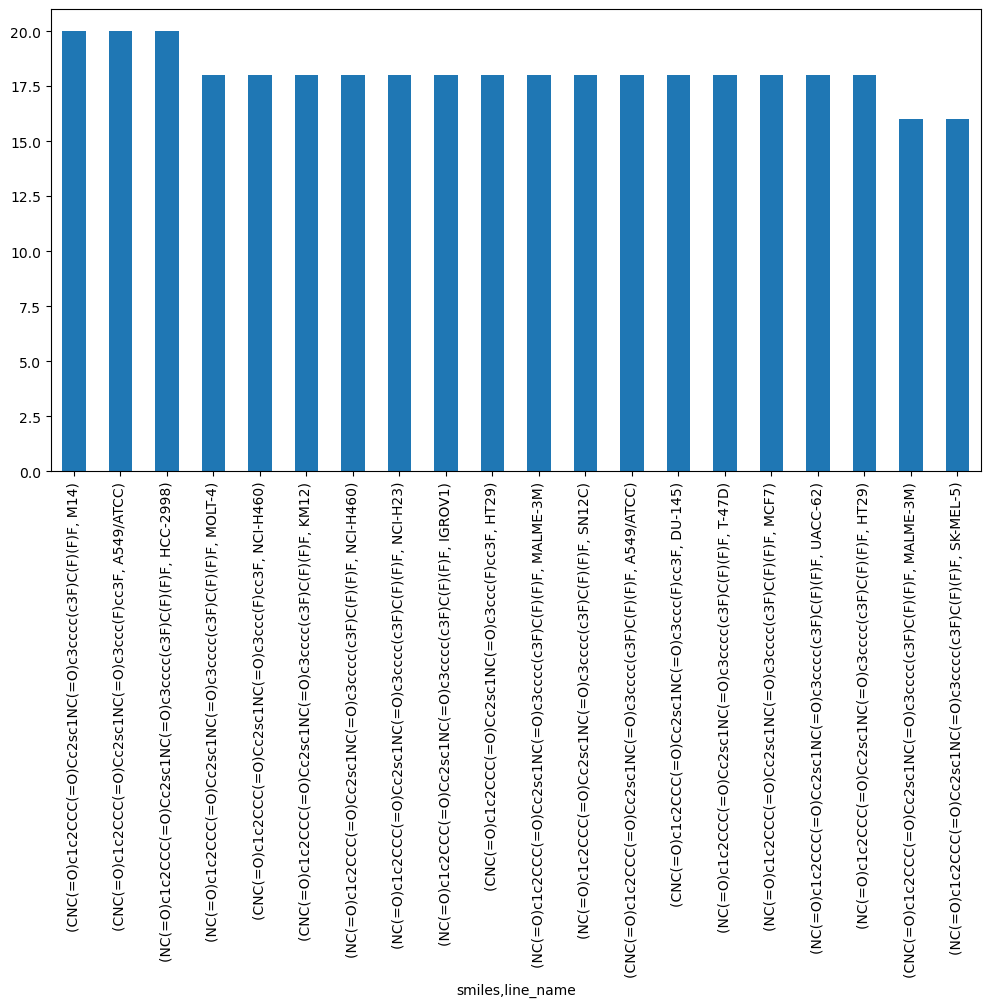

In [10]:
#new df adding back categorical data relevant to the model
drop_cols3 = ["conc_resp_assay_id", "conc_resp_element_id", "exp_id", "nsc", "log_hi_conc",
                 "conc_unit", "assay_time", "cas_number", "cas_string", "discreet", "count_giprcnt",
                 "std_dev_GI50", "std_dev_IC50", "std_dev_LC50", "std_dev_TGI",
                 "drug_name", "nsc_compound_namecode", "target", "concentration",
                 #"line_name", 
                 # "smiles", "mean_giprct", "mean_GI50", 
                 "mean_LC50", 
                 "mean_TGI",
                 "stddev_giprcnt", "stddev_pct_ctrl", "count_pct_ctrl"]

na_cat_df = expl_stat_resp.drop(columns=drop_cols3)

#  Plot missing va[lues by category
category_columns = ['smiles', 'line_name']  # Replace with your categorical column name

missing_by_category = na_cat_df.groupby(category_columns).apply(lambda x: x.isnull().sum())

# Get the total missing values by category and sort in descending order
missing_totals = missing_by_category.sum(axis=1).sort_values(ascending=False)

# Select top N categories with the most missing values
top_n = 20  # Adjust N as needed
top_missing_totals = missing_totals.head(top_n)

# Plot the top N missing values by category
top_missing_totals.plot(kind='bar', figsize=(12, 6))
plt.title(f'Top {top_n} Categories with Missing Values')
plt.xlabel('Categories')
plt.ylabel('Count of Missing Values')
plt.show()

created a bar plot showing the top categories with the most missing values grouped by the unique combinations of SMILES and cell line name. Result: A549 cell line is missing a lot of data. one particular compound appears to be missing data across cell lines. 
    I'm not really sure what else to do here at this point. I think I'll try inputing NA values and dropping to see if that effects the models but I am not sure what else to do with exploring the NA value patterns here.
    That being said, I'm going to move on and clean up my SMILES strings list for modeling next.